In [1]:
%who

Interactive namespace is empty.


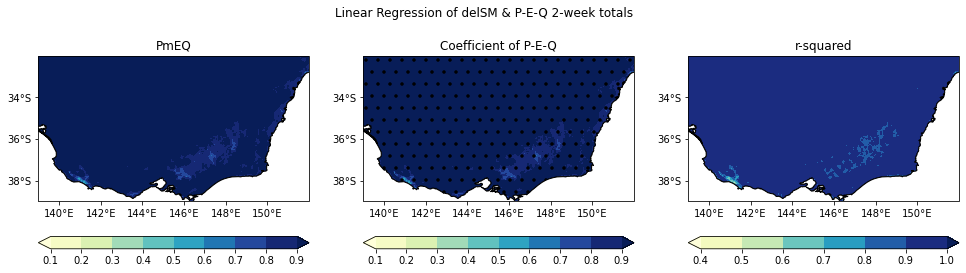

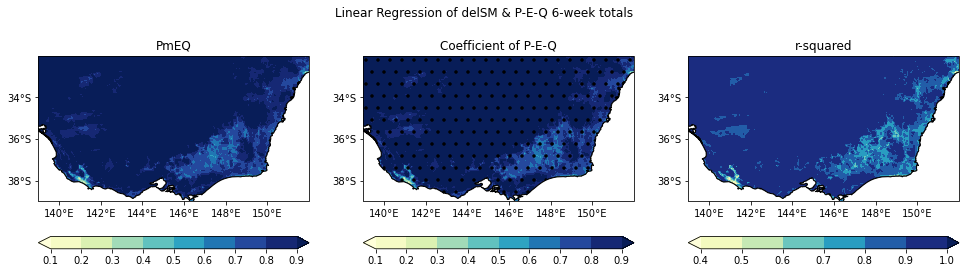

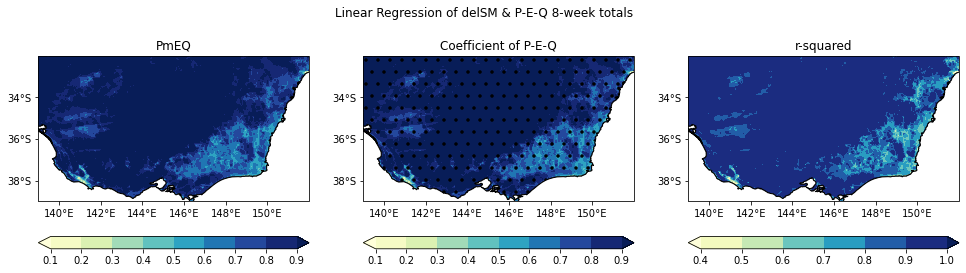

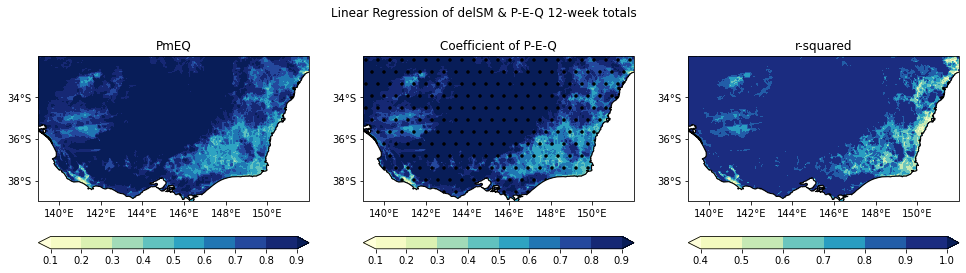

In [1]:
# Spatial plot of the coefficients of SM P-E-Q relationship

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

weeks = [2, 6, 8, 12]
ts_list = ['week' + str(x) for x in weeks]
tsText_list = [str(x) + '-week totals' for x in weeks]

main = 'Linear Regression of delSM & P-E-Q'

for i in range(len(weeks)):
    ts = ts_list[i]
    tsText = tsText_list[i]
    
    # Define the contour levels to use in plt.contourf
    clevs_list = [np.linspace(0.1,0.9,9), np.linspace(0.1,0.9,9), np.linspace(0.4,1,7)]
    # clevs = 9; clevs_list = None

    # get data
    data_path = '/g/data/w97/ad9701/p_prob_analysis/temp_files/sm_' + ts + '/'
    fname = 'sm_PmEQ_lm_noIntercept_results.nc'
    ds = xr.open_dataset(data_path + fname)

    # names of data arrays within the file
    params = 'lm_params'
    pval = 'lm_pvalues'
    rsq = 'r-squared'

    # select significance level (p < alpha), drivers and thresholds to plot
    alpha = 0.05
    outdir = 'figures/SM_PminusEQ_linReg/'
    
    figname = ts + '_delSM_PmEQ_regCoeff_noIntercept_sig_' + str(alpha) + '.png'

    data_list = [ds[params][:,:,0], ds[params][:,:,0], ds[rsq]]
    data_hatch_list = [None, ds[pval][:,:,0] , None]
    title_list = [ds.parameter.values[0], 'Coefficient of P-E-Q']
    title_list.append(rsq)
    cBarText = ' '
    cmapSel = 'YlGnBu' #'BrBG'
    mainTitle = main + ' ' + tsText

    %run -i drought_probability/spatial_plot_3panels_indivCbar.py
